In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/France/energy-france.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='FRA']
pop_table = pd.read_csv('../BDD/population.csv')
pop_table = pop_table[pop_table.Code=='FRA']
FR_table = pd.merge(gdp_table, pop_table, on=['Year'])
FR_table = pd.merge(FR_table, energy_table, on=['Year'])

In [2]:
pop = FR_table['Total population (Gapminder, HYDE & UN)']
gdp = FR_table['GDP per capita']*pop
energy = FR_table['Energy (PetaJoules)']
year = FR_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

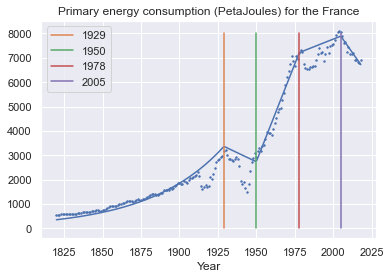

In [3]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (PetaJoules) for the France')
r, y0 = reg.expReg(year[:20], energy[:20])
y0, r, a,c,e,g,x1,x2,x3,x4 = 1.8*10**-14,  0.020616948382301577, -30,160,25,-90,1929,1950,1978,2005
plt.plot(yplot, reg.expllll(yplot,y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0, 8000], label=str(x1))
plt.plot([x2, x2], [0, 8000], label=str(x2))
plt.plot([x3, x3], [0, 8000], label=str(x3))
plt.plot([x4, x4], [0, 8000], label=str(x4))
plt.legend()

Text(0, 0.5, '10e12 $')

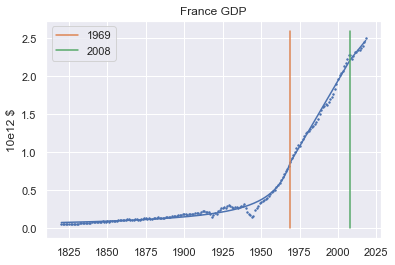

In [4]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('France GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.6], label=str(int(x1)))
plt.plot([x2, x2], [0, 2.6], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')

(0.232246092312, 0.022994940000000002, 9.999725341796875, 0.0023861308963835986, 0.00828845044710637, 0.0030365345809477222)


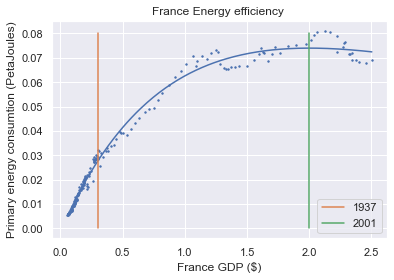

In [5]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e, s= 2)
plt.xlabel('France GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('France Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [0,20])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.3, 0.3],[0.0, 0.08], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.08], label = str(year_max)) 
plt.legend()

Text(0.5, 1.0, 'Energy intensity (10e3 PetaJoules/$)')

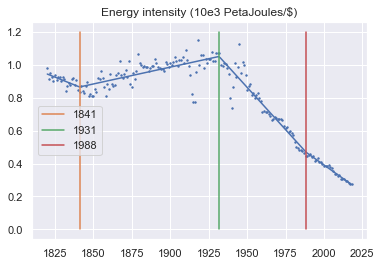

In [20]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))
plt.plot([x1, x1], [0, 1.2], label=str(int(x1)))
plt.plot([x2, x2], [0, 1.2], label=str(int(x2)))
plt.plot([x3, x3], [0, 1.2], label=str(int(x3)))
plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')